<a href="https://colab.research.google.com/github/DhruvAjayToshniwal/Bollinger-Bands-Trading-Strategy-with-Python/blob/main/Bollinger_Bands_Trading_Strategy_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = 'AMZN'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1')

# See the data
print(tickerDf)

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   93.750000   94.900497   93.207497   94.900497   
2020-01-03 00:00:00-05:00   93.224998   94.309998   93.224998   93.748497   
2020-01-06 00:00:00-05:00   93.000000   95.184502   93.000000   95.143997   
2020-01-07 00:00:00-05:00   95.224998   95.694504   94.601997   95.343002   
2020-01-08 00:00:00-05:00   94.902000   95.550003   94.321999   94.598503   
...                               ...         ...         ...         ...   
2024-06-18 00:00:00-04:00  183.740005  184.289993  181.429993  182.809998   
2024-06-20 00:00:00-04:00  182.910004  186.509995  182.720001  186.100006   
2024-06-21 00:00:00-04:00  187.800003  189.279999  185.860001  189.080002   
2024-06-24 00:00:00-04:00  189.330002  191.000000  185.330002  185.570007   
2024-06-25 00:00:00-04:00  186.820007  187.360001  185.889999  187.160004   

In [2]:
# Bollinger Bands
tickerDf['20 Day MA'] = tickerDf['Close'].rolling(window=20).mean()
tickerDf['20 Day STD'] = tickerDf['Close'].rolling(window=20).std()
tickerDf['Upper Band'] = tickerDf['20 Day MA'] + (tickerDf['20 Day STD'] * 2)
tickerDf['Lower Band'] = tickerDf['20 Day MA'] - (tickerDf['20 Day STD'] * 2)

# Simple Moving Averages
tickerDf['SMA_10'] = tickerDf['Close'].rolling(window=10).mean()
tickerDf['SMA_50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['SMA_200'] = tickerDf['Close'].rolling(window=200).mean()

# Exponential Moving Averages
tickerDf['EMA_12'] = tickerDf['Close'].ewm(span=12, adjust=False).mean()
tickerDf['EMA_26'] = tickerDf['Close'].ewm(span=26, adjust=False).mean()

# Moving Average Convergence Divergence
tickerDf['MACD_line'] = tickerDf['EMA_12'] - tickerDf['EMA_26']
tickerDf['Signal_line'] = tickerDf['MACD_line'].ewm(span=9, adjust=False).mean()
tickerDf['MACD_Hist'] = tickerDf['MACD_line'] - tickerDf['Signal_line']

In [3]:
tickerDf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,20 Day MA,20 Day STD,Upper Band,Lower Band,SMA_10,SMA_50,SMA_200,EMA_12,EMA_26,MACD_line,Signal_line,MACD_Hist
Date,,,,,,,,,,,,,,,,,,,
2024-06-18 00:00:00-04:00,183.740005,184.289993,181.429993,182.809998,36659200,0.0,0.0,182.590500,2.896112,188.382724,176.798276,184.612000,182.9432,159.81975,183.745791,183.270754,0.475037,0.392415,0.082622
2024-06-20 00:00:00-04:00,182.910004,186.509995,182.720001,186.100006,44726800,0.0,0.0,182.738000,2.999388,188.736777,176.739224,185.094000,182.9518,160.05965,184.107978,183.480329,0.627649,0.439462,0.188188
2024-06-21 00:00:00-04:00,187.800003,189.279999,185.860001,189.080002,72931800,0.0,0.0,183.035500,3.318429,189.672359,176.398642,185.502000,183.0144,160.31870,184.872905,183.895119,0.977786,0.547126,0.430659
2024-06-24 00:00:00-04:00,189.330002,191.000000,185.330002,185.570007,48841000,0.0,0.0,183.261501,3.329987,189.921475,176.601526,185.629001,182.9448,160.56975,184.980151,184.019185,0.960966,0.629894,0.331072
2024-06-25 00:00:00-04:00,186.820007,187.360001,185.889999,187.160004,4085806,0.0,0.0,183.582001,3.383581,190.349162,176.814839,185.639001,182.9654,160.81630,185.315513,184.251838,1.063675,0.716650,0.347025


In [4]:
# Relative Strength Index
delta = tickerDf['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
tickerDf['RSI'] = 100 - (100/(1 + rs))

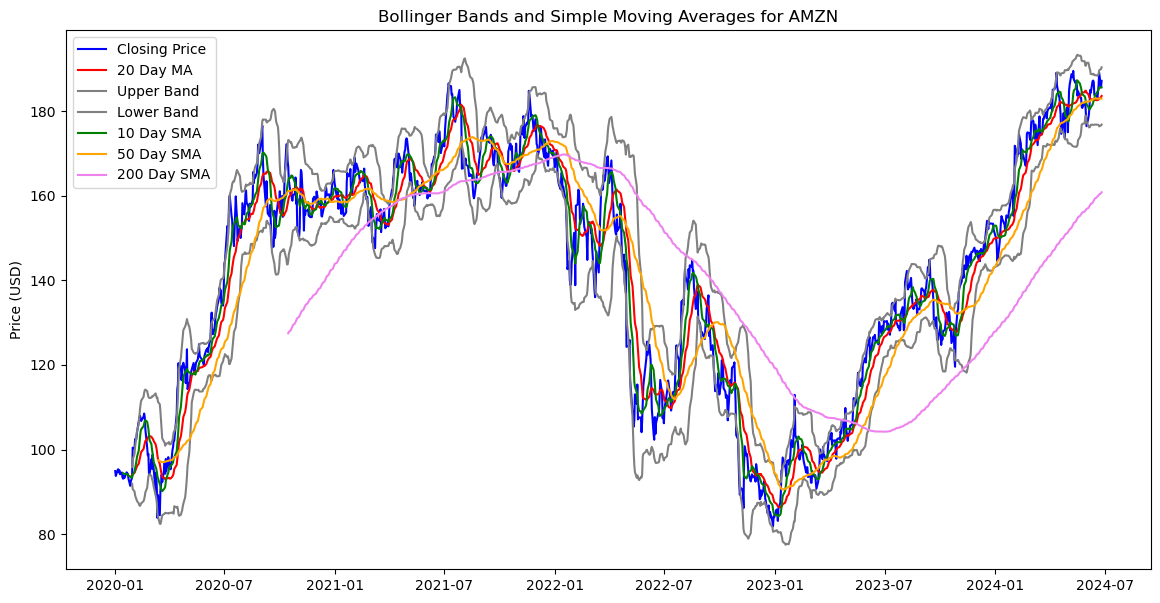

In [5]:
# Plotting Bollinger Bands, Simple Moving Averages and Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Closing Price', color='blue')
plt.plot(tickerDf['20 Day MA'], label='20 Day MA', color='red')
plt.plot(tickerDf['Upper Band'], label='Upper Band', color='grey')
plt.plot(tickerDf['Lower Band'], label='Lower Band', color='grey')
plt.plot(tickerDf['SMA_10'], label='10 Day SMA', color='green')
plt.plot(tickerDf['SMA_50'], label='50 Day SMA', color='orange')
plt.plot(tickerDf['SMA_200'], label='200 Day SMA', color='violet')
plt.title('Bollinger Bands and Simple Moving Averages for ' + tickerSymbol)
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


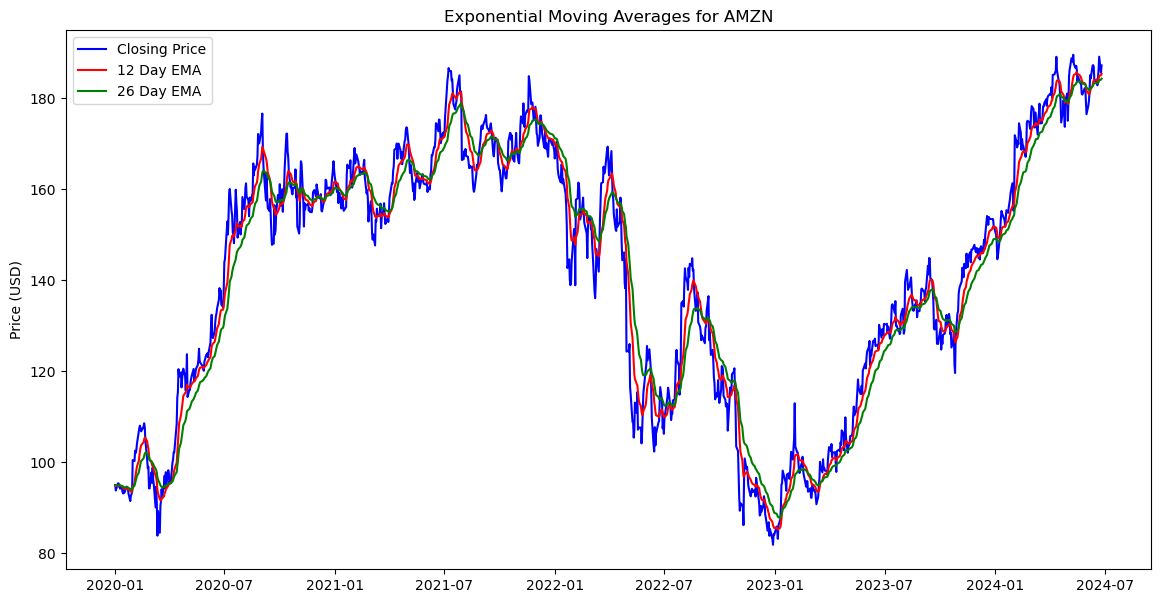

In [6]:
# Plotting Exponential Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Closing Price', color='blue')
plt.plot(tickerDf['EMA_12'], label='12 Day EMA', color='red')
plt.plot(tickerDf['EMA_26'], label='26 Day EMA', color='green')
plt.title('Exponential Moving Averages for ' + tickerSymbol)
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


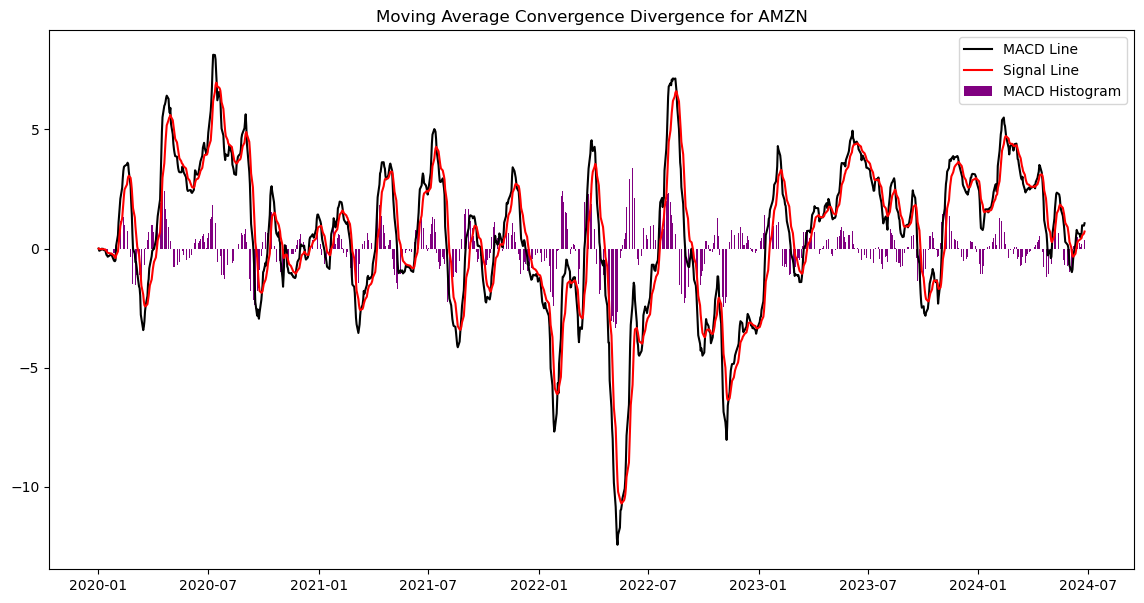

In [7]:
# Plotting Moving Average Convergence Divergence
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['MACD_line'], label='MACD Line', color='k')
plt.plot(tickerDf['Signal_line'], label='Signal Line', color='r')
plt.bar(tickerDf.index, tickerDf['MACD_Hist'], label='MACD Histogram', color='purple')
plt.title('Moving Average Convergence Divergence for ' + tickerSymbol)
plt.legend()
plt.show()

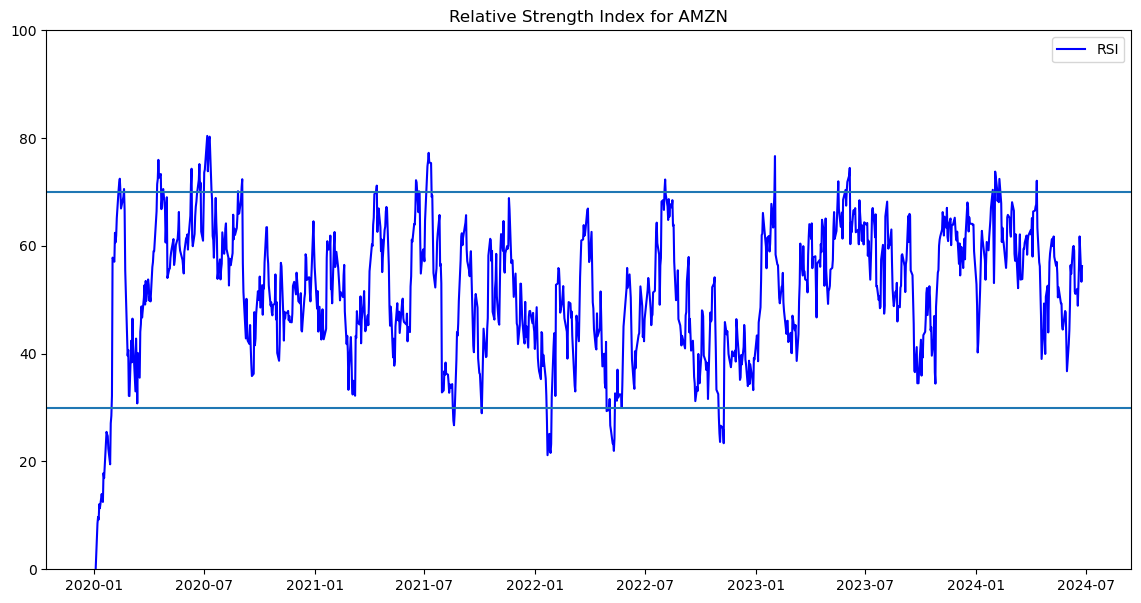

In [8]:
# Plotting Relative Strength Index
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['RSI'], label='RSI', color='blue')
plt.axhline([30])
plt.axhline([70])
plt.title('Relative Strength Index for ' + tickerSymbol)
plt.ylim(0,100)
plt.legend()
plt.show()


Implements a trading strategy based on Bollinger Bands: buys 100 shares when the closing price is below the lower Bollinger Band, and sells all shares when the closing price is above the upper Bollinger Band.

In [9]:
initial_capital = 10000  # Define your initial capital

# Create a dataframe to hold the trading strategy actions
trades = pd.DataFrame(index=tickerDf.index)
trades['Close'] = tickerDf['Close']
trades['Lower Band'] = tickerDf['Lower Band']
trades['Upper Band'] = tickerDf['Upper Band']
trades['Buy_Signal'] = (trades['Close'] < trades['Lower Band']).astype(int)
trades['Sell_Signal'] = (trades['Close'] > trades['Upper Band']).astype(int)
trades.tail(100)


,Close,Lower Band,Upper Band,Buy_Signal,Sell_Signal
Date,,,,,
2024-02-01 00:00:00-05:00,159.279999,145.581839,163.098160,0,0
2024-02-02 00:00:00-05:00,171.809998,145.069400,166.334598,0,1
2024-02-05 00:00:00-05:00,170.309998,145.627723,168.283274,0,1
2024-02-06 00:00:00-05:00,169.149994,146.024765,169.891231,0,0
2024-02-07 00:00:00-05:00,170.529999,146.161574,171.670422,0,0
...,...,...,...,...,...
2024-06-18 00:00:00-04:00,182.809998,176.798276,188.382724,0,0
2024-06-20 00:00:00-04:00,186.100006,176.739224,188.736777,0,0
2024-06-21 00:00:00-04:00,189.080002,176.398642,189.672359,0,0


<Axes: xlabel='Date'>

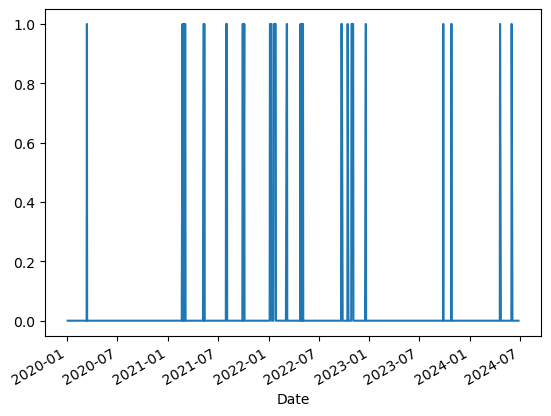

In [10]:
trades.Buy_Signal.plot()

In [11]:
# Create a dataframe for positions and holdings
positions = pd.DataFrame(index=trades.index).fillna(0)
holdings = pd.DataFrame(index=trades.index).fillna(0.0)



In [12]:
# Buy a 100 shares when the buy signal is triggered

num_of_shares = int(initial_capital / trades.iloc[0]['Close']) # 100

positions['Holdings'] = num_of_shares*trades['Buy_Signal']
# positions.describe()

In [13]:
# Update holdings. Sell all shares when the sell signal is triggered
positions['Holdings'] = positions['Holdings'] - num_of_shares*trades['Sell_Signal']

In [14]:
positions.describe()

,Holdings
count,1127.000000
mean,-3.260870
std,34.265204
min,-105.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,105.000000


In [15]:
# Update holdings. Can't sell if we don't have any
positions['Holdings'] = positions['Holdings'].clip(lower=0)
positions.describe()

,Holdings
count,1127.000000
mean,4.006211
std,20.123662
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,105.000000


In [16]:
# Initialize the portfolio with value owned
holdings['Holdings'] = positions.multiply(trades['Close'], axis=0)

In [17]:
# Store the difference in shares owned
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio = holdings

# Add `cash` to portfolio
portfolio['Cash'] = initial_capital - (pos_diff.multiply(trades['Close'], axis=0)).cumsum()

# Add `total` to portfolio
portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']

# Add `returns` to portfolio
portfolio['Returns'] = portfolio['Total'].pct_change()

portfolio.head(50)

,Holdings,Cash,Total,Returns
Date,,,,
2020-01-02 00:00:00-05:00,0.000000,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,0.000000,10000.000000,10000.000000,NaN
2020-01-06 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-07 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-08 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-09 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-10 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-13 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-14 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000


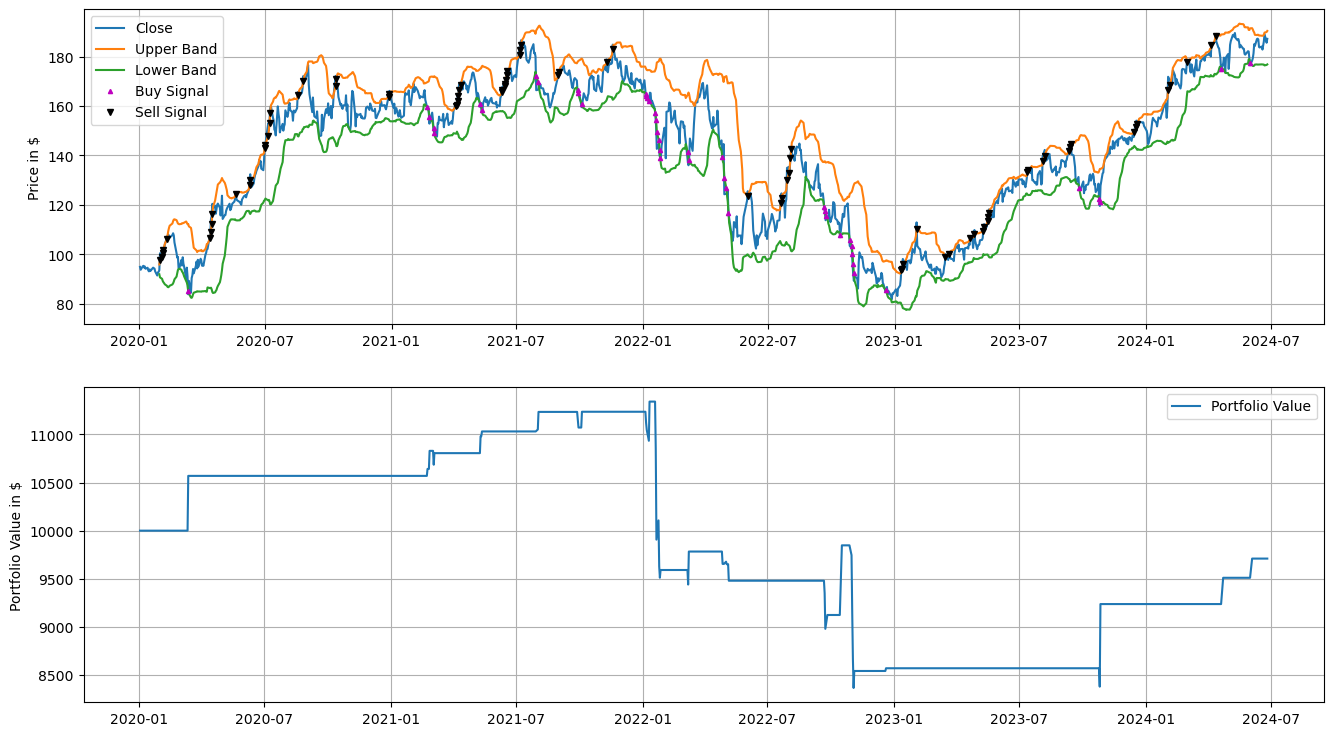

In [18]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

for c in ['Close', 'Upper Band', 'Lower Band']:
    ax1.plot(trades.index, trades[c], label=c)
ax1.plot(trades.loc[trades['Buy_Signal'] == 1].index, trades.loc[trades['Buy_Signal'] == 1]['Lower Band'], '^', markersize=3, color='m', label='Buy Signal')
ax1.plot(trades.loc[trades['Sell_Signal'] == 1].index, trades.loc[trades['Sell_Signal'] == 1]['Upper Band'], 'v', markersize=5, color='k', label='Sell Signal')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(portfolio.index, portfolio['Total'], label='Portfolio Value')
ax2.set_ylabel('Portfolio Value in $')
ax2.legend(loc='best')
ax2.grid()

plt.show()

Compares this strategy to a simple 'Buy and Hold' strategy for S&P 500 by calculating and plotting the portfolio growth for both strategies.

In [19]:
# Download S&P 500 data
sp_data = yf.Ticker('^GSPC').history(start='2020-1-1')


In [20]:
# Create a new dataframe to hold the 'Buy and Hold' strategy
bh_portfolio = pd.DataFrame(index=sp_data.index)
bh_portfolio['Close'] = sp_data['Close']
bh_portfolio['Returns'] = bh_portfolio['Close'].pct_change()
# Buy at the start and hold
bh_portfolio['Holdings'] = initial_capital/bh_portfolio.iloc[0]['Close']*bh_portfolio['Close']
# bh_portfolio['Cash'] = initial_capital - bh_portfolio['Holdings']
bh_portfolio['Total'] = bh_portfolio['Holdings']

bh_portfolio

,Close,Returns,Holdings,Total
Date,,,,
2020-01-02 00:00:00-05:00,3257.850098,NaN,10000.000000,10000.000000
2020-01-03 00:00:00-05:00,3234.850098,-0.007060,9929.401294,9929.401294
2020-01-06 00:00:00-05:00,3246.280029,0.003533,9964.485572,9964.485572
2020-01-07 00:00:00-05:00,3237.179932,-0.002803,9936.552741,9936.552741
2020-01-08 00:00:00-05:00,3253.050049,0.004902,9985.266207,9985.266207
...,...,...,...,...
2024-06-17 00:00:00-04:00,5473.229980,0.007664,16800.128356,16800.128356
2024-06-18 00:00:00-04:00,5487.029785,0.002521,16842.486980,16842.486980
2024-06-20 00:00:00-04:00,5473.169922,-0.002526,16799.944005,16799.944005


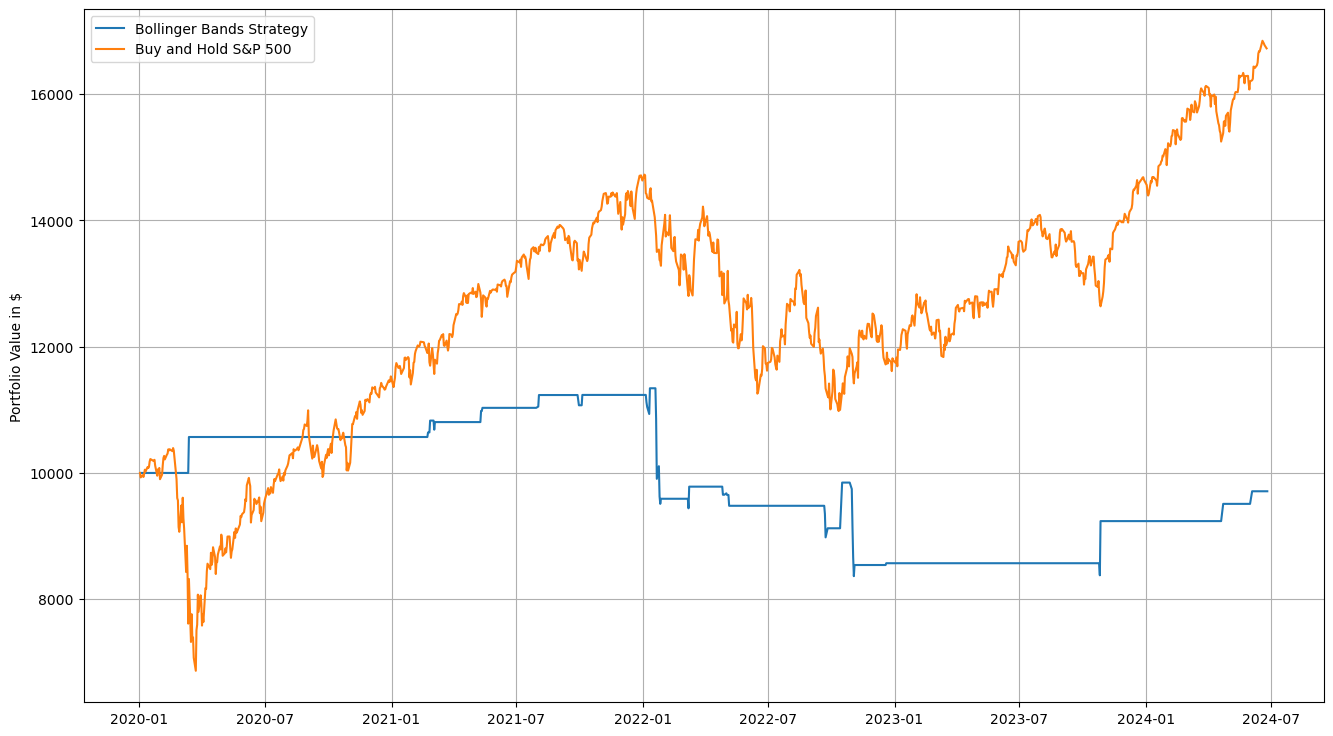

In [21]:



# Plot both the Bollinger Bands strategy and 'Buy and Hold' strategy
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(portfolio.index, portfolio['Total'], label='Bollinger Bands Strategy')
ax.plot(bh_portfolio.index, bh_portfolio['Total'], label='Buy and Hold S&P 500')
ax.set_ylabel('Portfolio Value in $')
ax.legend(loc='best')
ax.grid()

plt.show()
